# Regresión Lineal

Primero importamos las librerias que vamos a utilizar, comenzando con las más pesadas y pasando a las auxiliares

In [11]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Primero importamos el dataset
diabetes_dataset = datasets.load_diabetes()

In [3]:
diabetes_dataset.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
df = pd.DataFrame(diabetes_dataset['data'], columns=diabetes_dataset['feature_names'])

In [5]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [6]:
linear_reg = LinearRegression()

**Preparamos los datos para el entrenamiento y la validación**

In [7]:
x_data = df.bmi
y_data = pd.DataFrame(diabetes_dataset['target'])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [18]:
train_x = np.array(x_train).reshape(-1, 1)
train_y = np.array(y_train).reshape(-1, 1)

In [21]:
linear_reg.fit(train_x, train_y)

LinearRegression()

**Veamos la ecuación de la Recta**

In [25]:
print(f'Pendiente: {round(linear_reg.coef_[0][0], 2)}')
print(f'Intersección con el eje y: {round(linear_reg.intercept_[0], 2)}')
print(f'y = {round(linear_reg.coef_[0][0], 2)}x + {round(linear_reg.intercept_[0], 2)}')

Pendiente: 903.87
Intersección con el eje y: 153.36
y = 903.87x + 153.36


In [27]:
test_x = np.array(x_test).reshape(-1, 1)
y_predicted = linear_reg.predict(test_x)

In [35]:
print(f'Calificación de entrenamiento: {linear_reg.score(train_x, train_y)}')
print(f'Calificación de predicción: {linear_reg.score(test_x, np.array(y_test).reshape(-1, 1))}')

Calificación de entrenamiento: 0.31125951839123756
Calificación de predicción: 0.45776852164963644


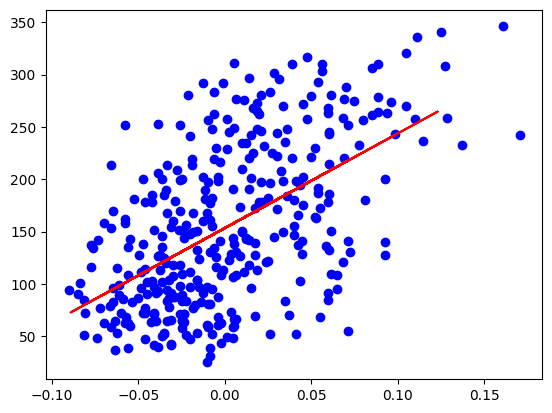

In [37]:
plt.scatter(x_train, y_train, c='blue')
plt.plot(x_test, y_predicted, c='red')
plt.show()